In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib

# For reproducibility
np.random.seed(42)

In [14]:
df = pd.read_csv("data/leakage_data.csv")

<Axes: xlabel='leakage_label'>

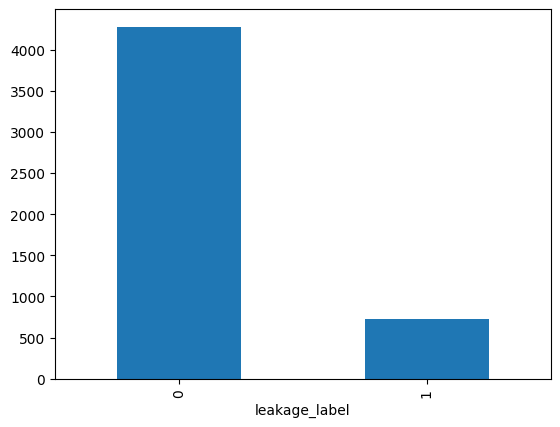

In [8]:
df.leakage_label.value_counts().plot(kind="bar")

#### Encode categorical variables and prepare features

In [9]:
# encoding for pet_species and breed
df_encoded = pd.get_dummies(df, columns=["pet_species", "pet_breed"], drop_first=True)

X = df_encoded.drop(columns=["leakage_label", "id_loss"])
y = df_encoded["leakage_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 4000
Test samples: 1000


#### Model Training

In [10]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob).round(3))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       856
           1       0.20      0.19      0.20       144

    accuracy                           0.78      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.77      0.78      0.77      1000

ROC AUC: 0.561
